In [1]:
import pandas as pd

In [2]:
link = ("https://github.com/dnllvrvz/Social-Network-Dataset/"
        "raw/master/Social%20Network%20Dataset.xlsx")

In [3]:
network_data = pd.read_excel(link, sheet_name=['Elements', 'Connections'])

In [4]:
elements_data = network_data['Elements'] # node list
connections_data = network_data['Connections'] # edge list

In [6]:
elements_data.head()

,Label,Type,School (ID),Answered the form
0,S-c1b610,Student,27,Yes
1,S-4985b3,Student,25,Yes
2,S-376418,Student,67,Yes
3,S-d00f38,Student,24,Yes
4,S-e538e3,Student,30,Yes


In [7]:
connections_data.head()

,From,To,Type,Weight,When
0,S-c1b610,S-7d9053,Other,1.0,2012.0
1,S-4985b3,S-e7dad4,School,1.0,2015.0
2,S-376418,S-ab3070,School,1.0,2012.0
3,S-d00f38,S-6e1f64,School,1.0,2016.0
4,S-e538e3,S-596786,Other,1.0,1994.0


In [8]:
import networkx as nx

In [9]:
edge_cols = ['Type','Weight','When']
graph=nx.convert_matrix.from_pandas_edgelist(connections_data,
                                            source='From',
                                            target='To',
                                            edge_attr=edge_cols)

In [10]:
from random import sample
# select 10 random edges from graph
sampled_edges=sample(graph.edges,10) 

In [11]:
# Just pick one for selected 10
graph.edges[sampled_edges[0]]

{'Type': nan, 'Weight': 0.6, 'When': 2015.0}

In [16]:
node_dict = elements_data.set_index('Label').to_dict(orient='index')
nx.set_node_attributes(graph, node_dict)

In [17]:
sampled_nodes=sample(graph.nodes,10)
graph.nodes[sampled_nodes[0]]

{'Type': 'Student', 'School (ID)': 55, 'Answered the form': 'No'}

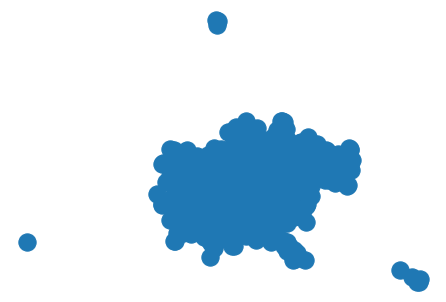

In [18]:
nx.draw(graph)

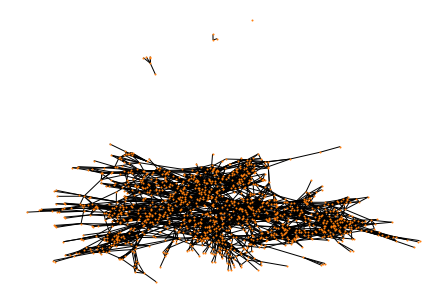

In [27]:
nx.draw(graph, node_size=1, node_color='C1')

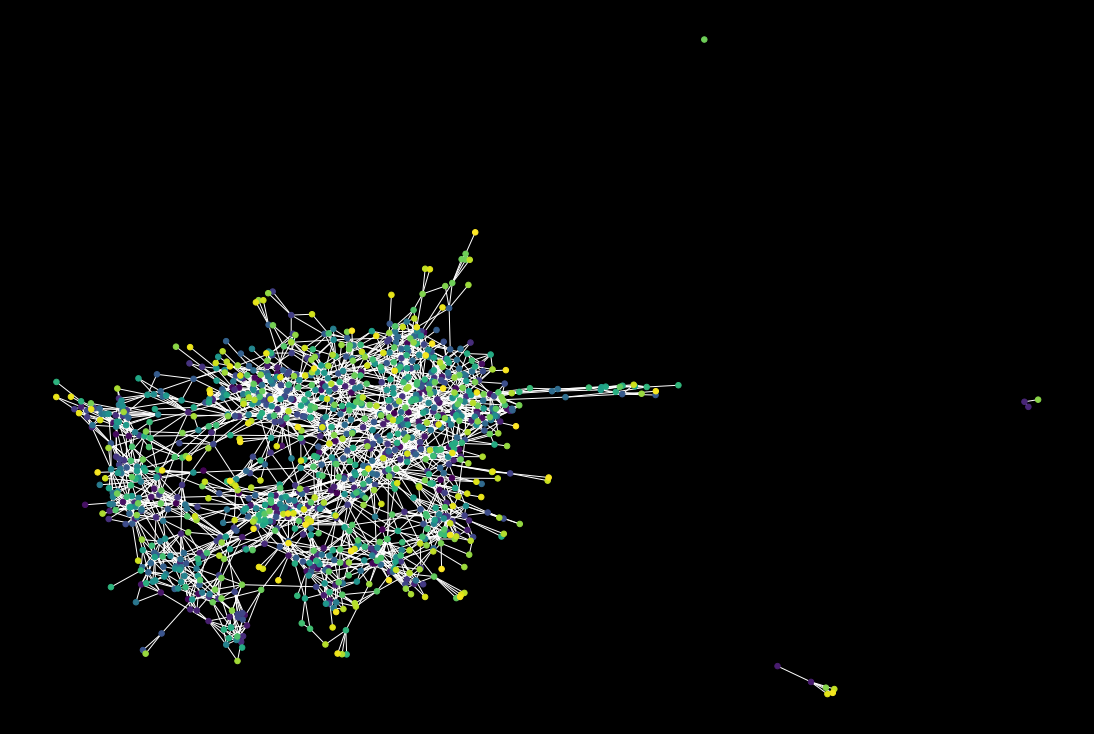

In [26]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(15, 10))
colors = np.linspace(0, 1, len(graph.nodes))
nx.draw(graph, 
        node_size=30,
        node_color=colors,
        edge_color='white')
fig.set_facecolor('black')

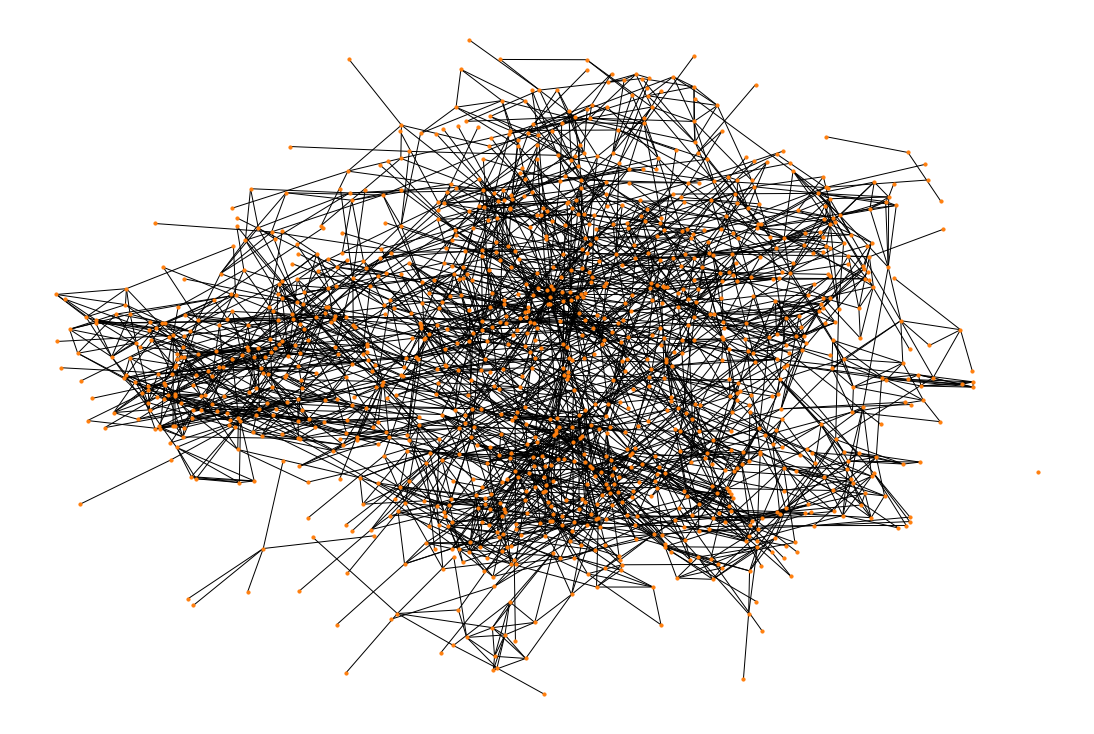

In [31]:
plt.figure(figsize=(15,10))
k=0.1
# k sets Optimal distance between nodes.  If None the distance is set to
#     1/sqrt(n) where n is the number of nodes.
layout=nx.spring_layout(graph,k=k)
nx.draw(graph, node_size=10, node_color='C1',pos=layout)
fig.set_facecolor('black')

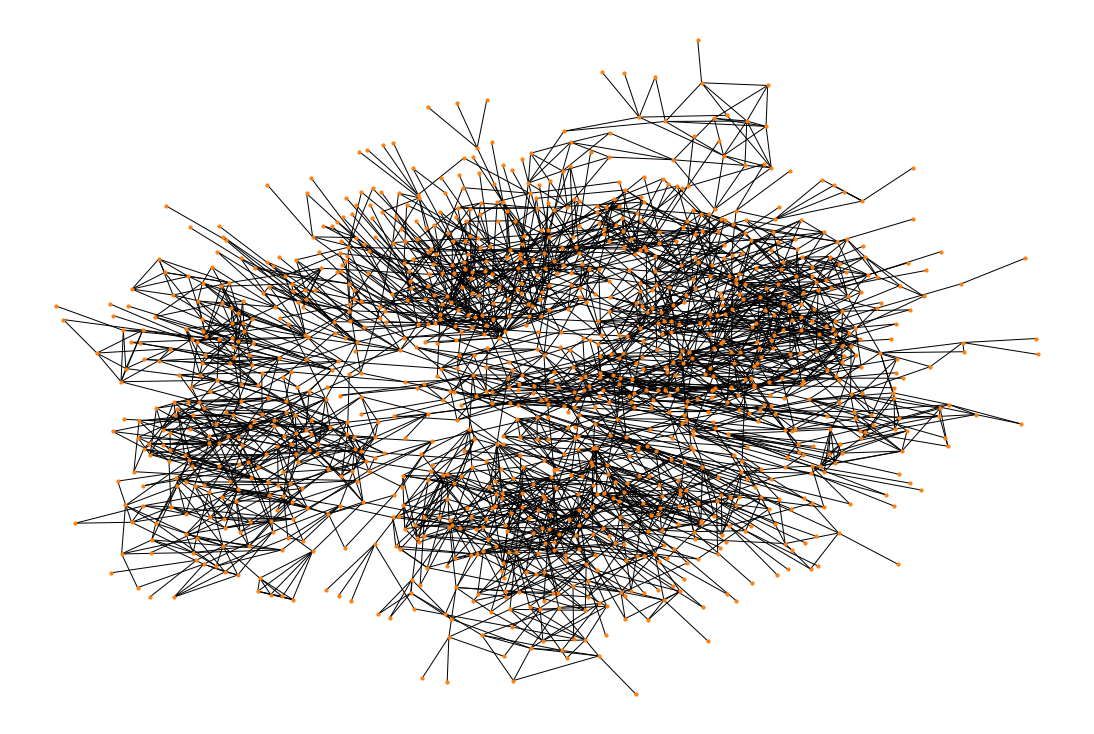

In [34]:
plt.figure(figsize=(15, 10))

layout = nx.kamada_kawai_layout(graph)

nx.draw(graph,
        node_size=10,
        node_color='C1',
        pos=layout)
fig.set_facecolor('black')

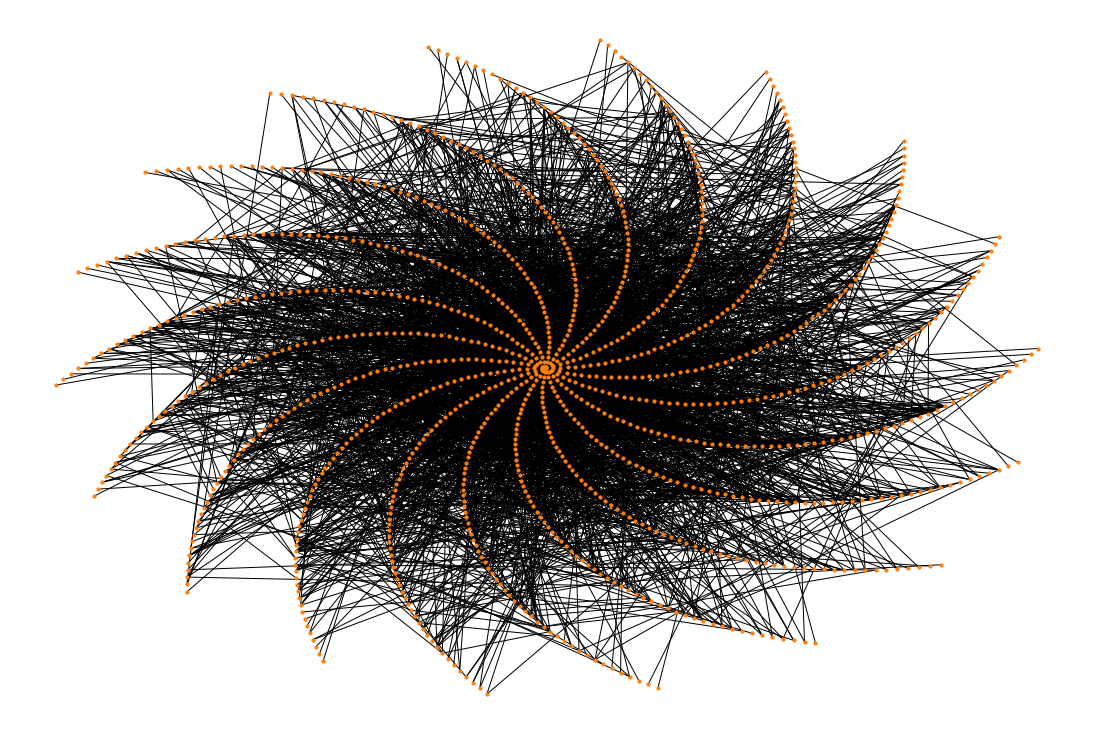

In [33]:
plt.figure(figsize=(15, 10))

layout = nx.spiral_layout(graph)

nx.draw(graph,
        node_size=10,
        node_color='C1',
        pos=layout)